As a product manager for a fitness studio and am interested in understanding the current demand for digital fitness classes, I conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

International and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Task #1:
Explore the peak of global search for "workout".

To visualize the result and make it more apparent, we will use a bar chart. 

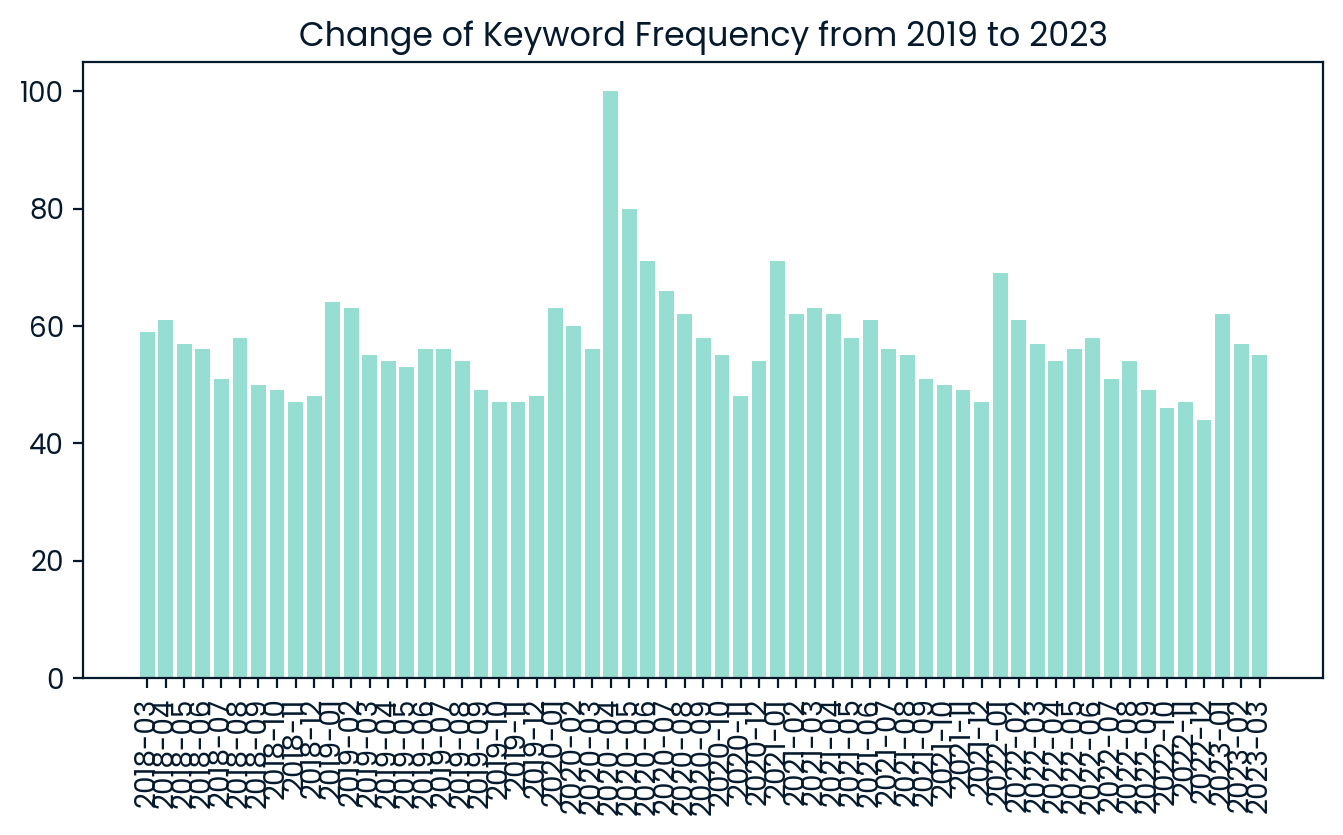

In [2]:
df_workout = pd.read_csv("data/workout.csv")

plt.figure(figsize=(8, 4))
plt.bar(df_workout["month"], df_workout["workout_worldwide"], color = '#96DED1')

plt.title('Change of Keyword Frequency from 2019 to 2023')
plt.xticks(rotation=90)
plt.show()

year_str = "2020"

## Task #2:
Next, we will explore the most popular keyword during the pandemic, and the most popular keyword right now. 

In order to show the changes, we will use a line plot. 

In [3]:
keywords_month = pd.read_csv('data/three_keywords.csv')
# add a year column
keywords_month['year'] = keywords_month['month'].apply(lambda x: x.split('-')[0])

keywords_year = keywords_month.groupby('year').sum()

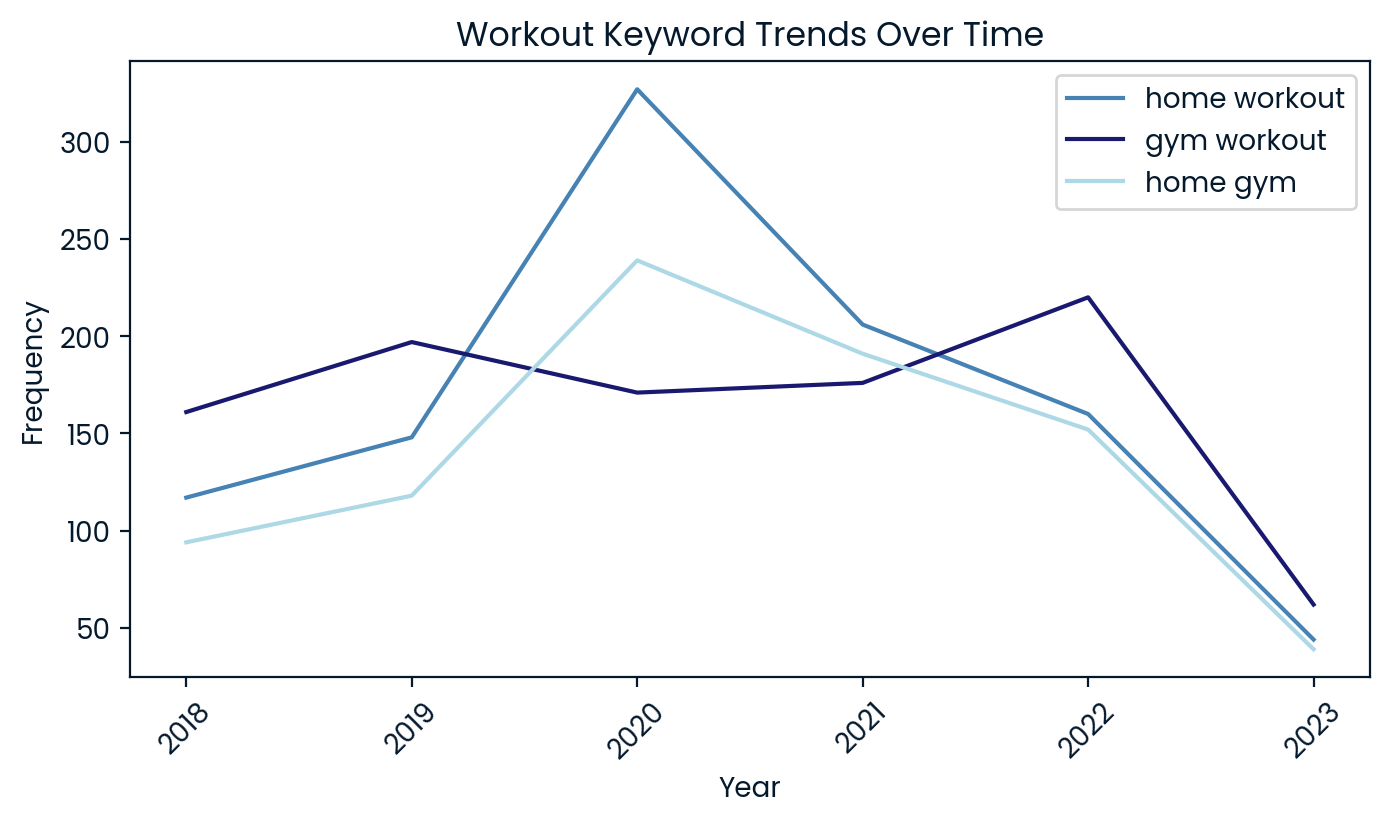

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(keywords_year.index, keywords_year['home_workout_worldwide'], label='home workout', color = '#4682B4')
ax.plot(keywords_year.index, keywords_year['gym_workout_worldwide'], label='gym workout', color = '#191970')
ax.plot(keywords_year.index, keywords_year['home_gym_worldwide'], label='home gym', color = '#ADD8E6')

ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Workout Keyword Trends Over Time')
ax.legend()
plt.xticks(rotation=45)

plt.show()

In [5]:
peak_covid = 'home workout'
current = 'gym workout'

During the COVID pandemic, "home workout" is more popular, while currently more people choose "gym workout". 

## Task #3:
Now we are going to compare the interest for workouts among different countries. 

In [6]:
workout_country = pd.read_csv('data/workout_geo.csv')
workout_country.head(10)

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN
5,United States,100.0
6,Gibraltar,NaN
7,Northern Mariana Islands,NaN
8,American Samoa,NaN
9,Bermuda,NaN


Because there are some null values, we first clean the dataframe. 

In [7]:
workout_country = workout_country.dropna(subset = 'workout_2018_2023')

Now we can plot a bar chart to show the frequency of the "workout" keyword for each countries. 

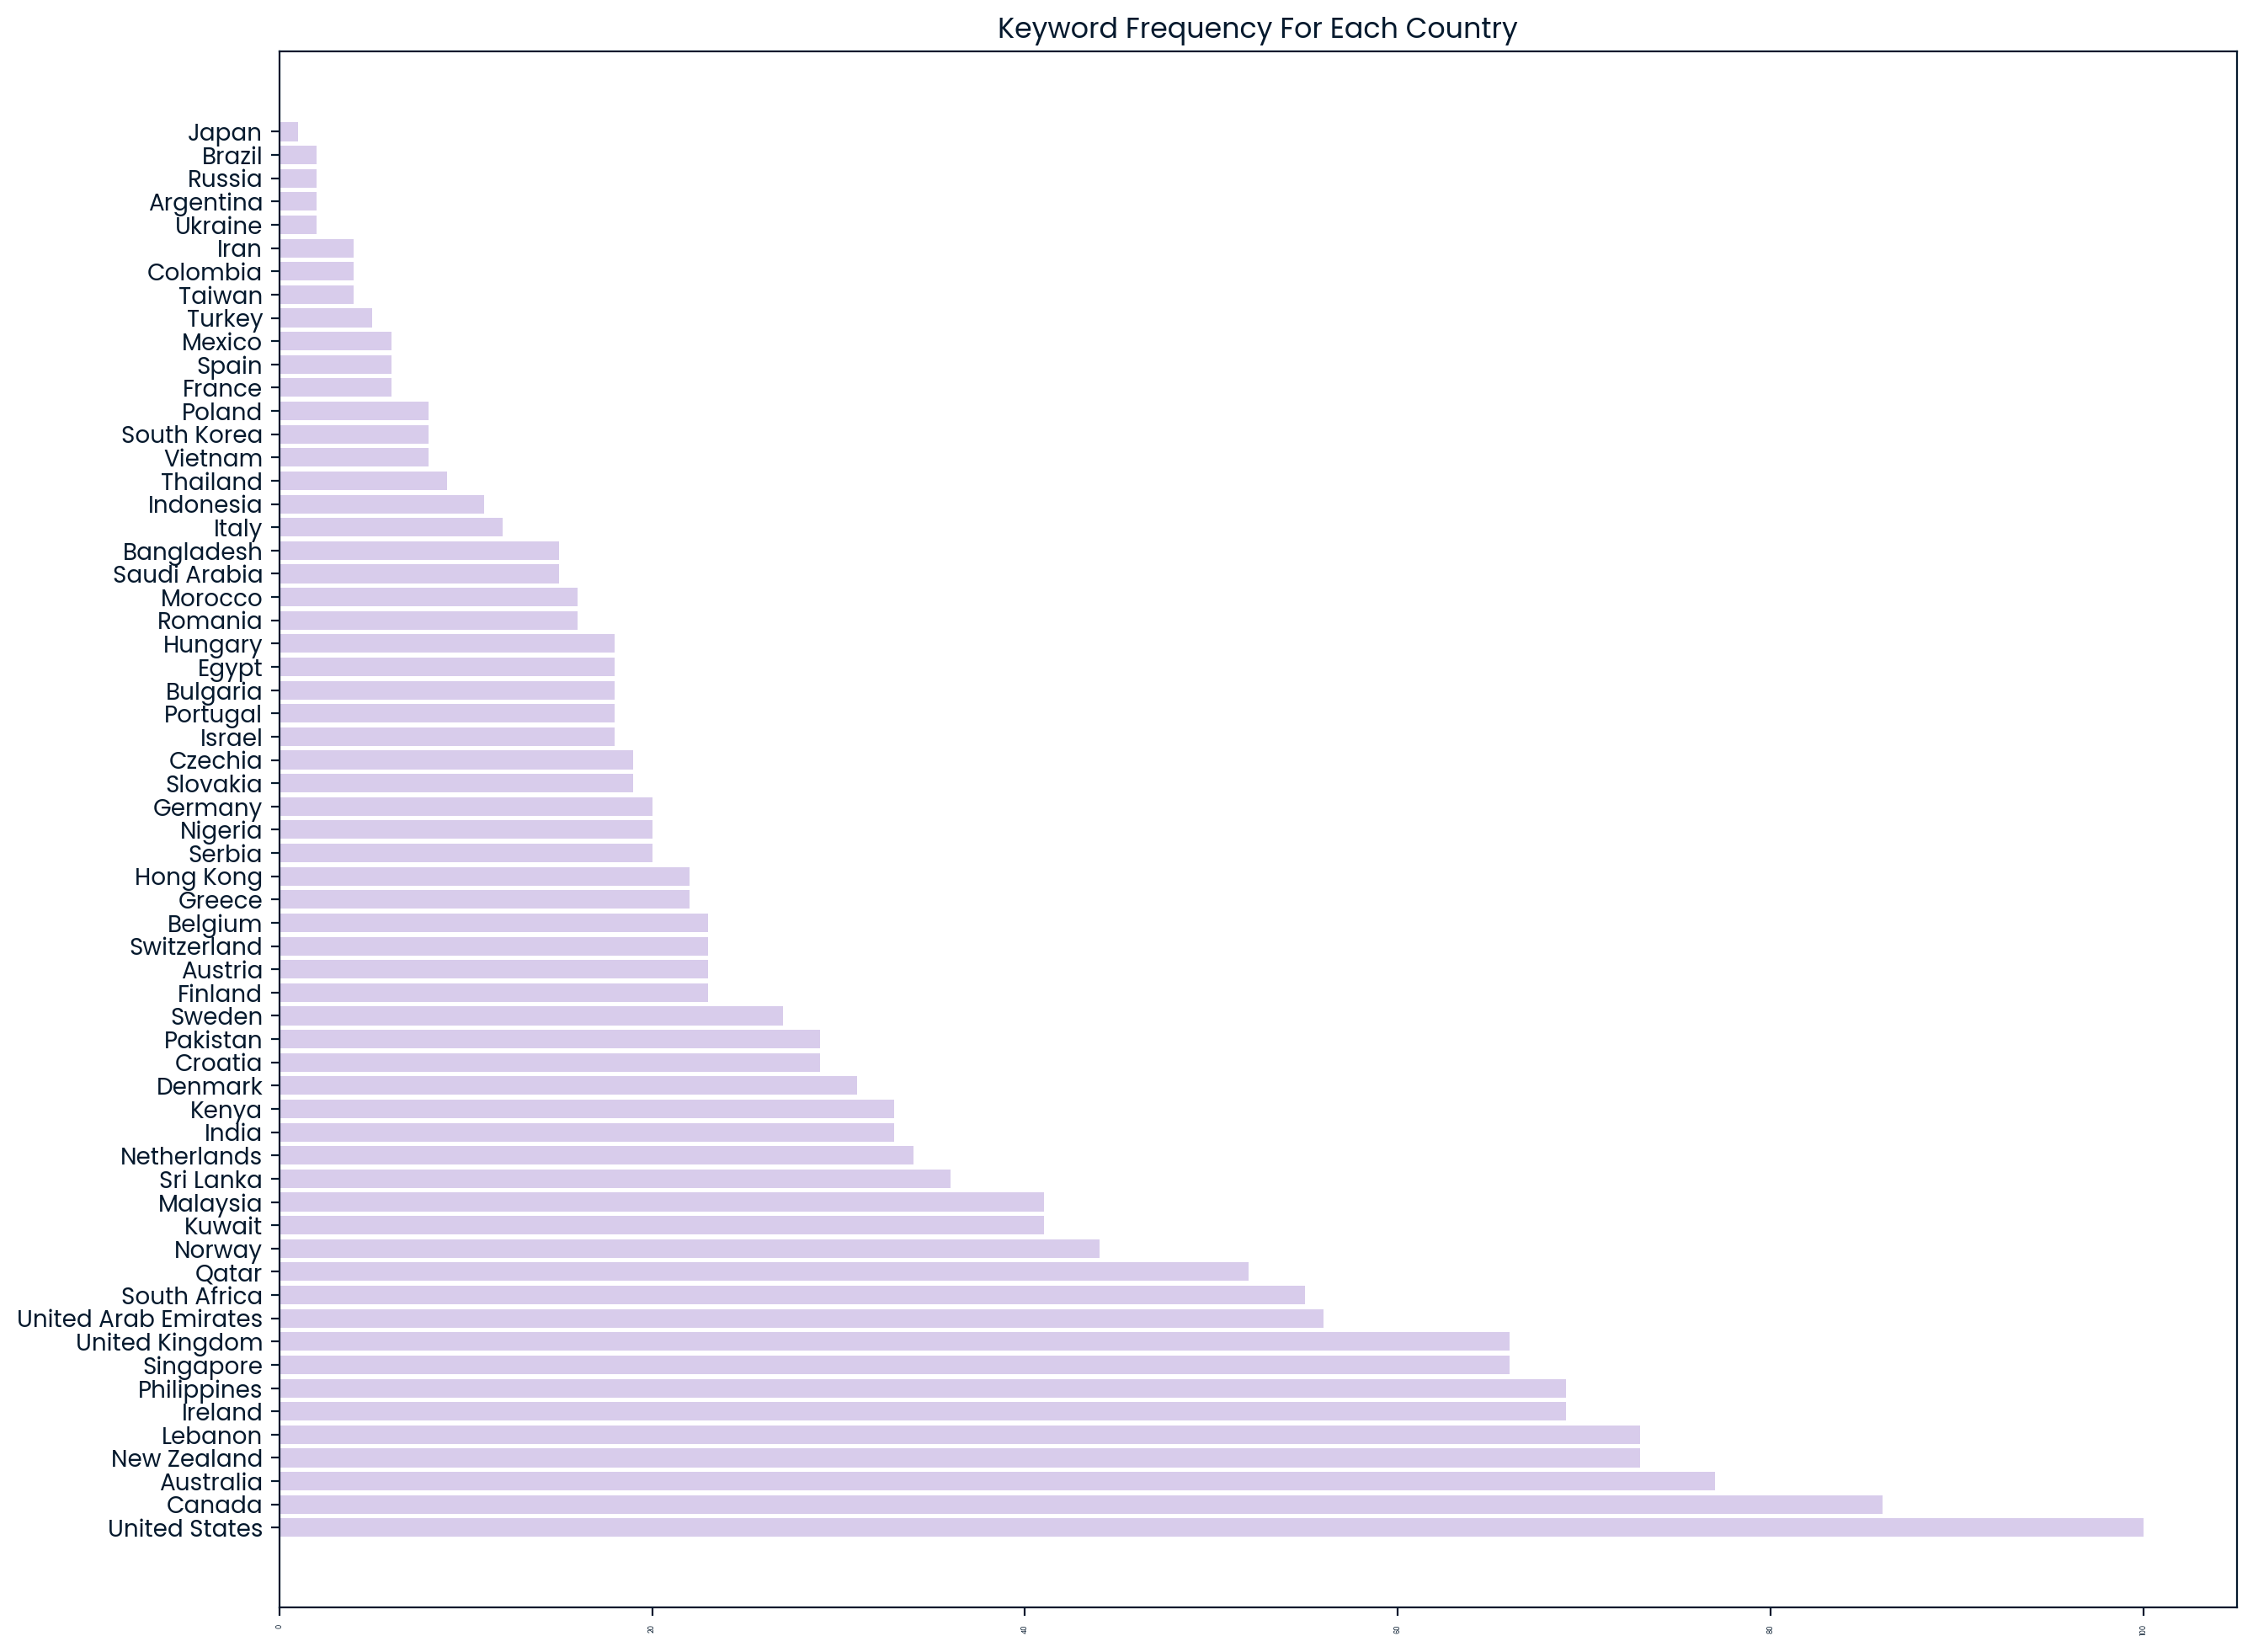

In [8]:
plt.figure(figsize=(15, 12))
plt.barh(workout_country['country'], workout_country['workout_2018_2023'], color = '#D8CCEB')

plt.title('Keyword Frequency For Each Country')
plt.xticks(rotation = 90, fontsize = 3)
plt.show()

Among the United States, Australia, and Japan, the United States had the most frequency in keyword "workout", supporting the claim that people in the United States had the highest interest for workouts. 

In [9]:
top_country = 'United States'

## Task #4:
Finally, we will consider the posibility of expanding the virtual home workouts offering to Philippines and Malaysia by comparing their interests for home workouts. 

In [10]:
keywords_countries = pd.read_csv('data/three_keywords_geo.csv')
keywords_pm = keywords_countries[(keywords_countries.get('Country') == 'Philippines') | \
                    (keywords_countries.get('Country') == 'Malaysia')].set_index('Country')
keywords_pm

,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
Country,,,
Philippines,52.0,38.0,10.0
Malaysia,47.0,38.0,15.0


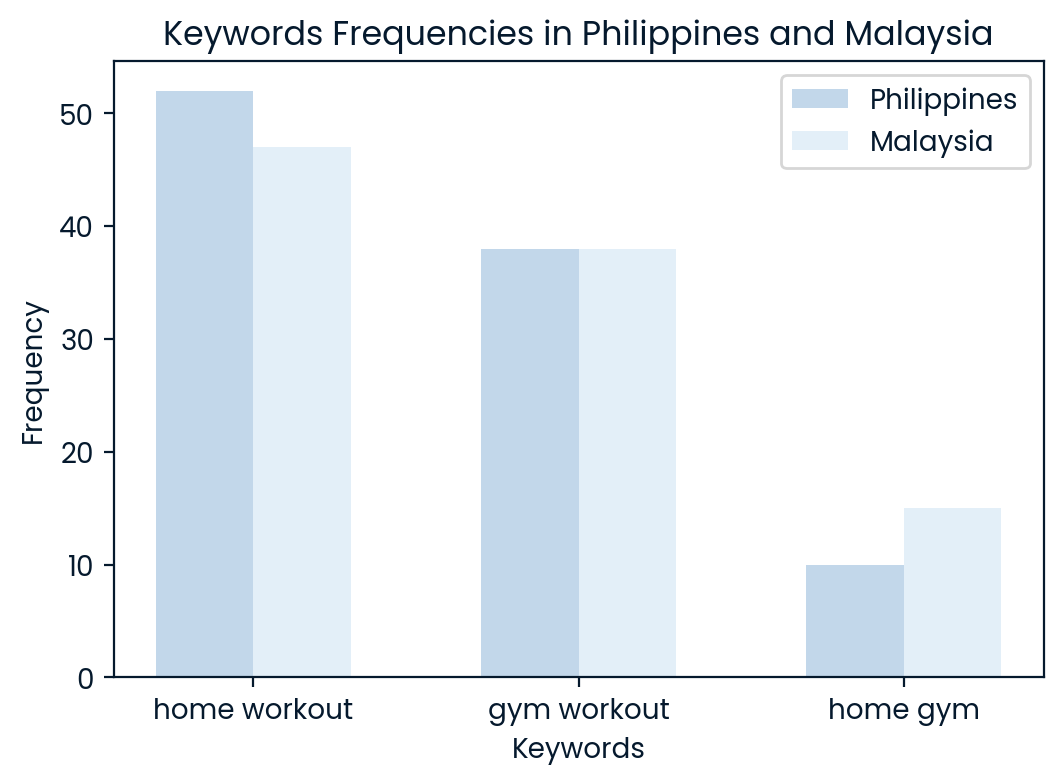

In [11]:
x_labels = ['home workout', 'gym workout', 'home gym']
x = np.arange(3)
width = 0.3

plt.figure(figsize=(6, 4))

plt.bar(x - width/2, keywords_pm.loc['Philippines'], width = width, color='#9ABDDC', alpha=0.6, label='Philippines')

plt.bar(x + width/2, keywords_pm.loc['Malaysia'], width = width, color='#D1E5F4', alpha=0.6, label='Malaysia')

plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.title('Keywords Frequencies in Philippines and Malaysia')
plt.xticks(x, x_labels) 
plt.legend()

plt.show()

In the overlapping bar chart above, we can see that Philippines has more interest in home workout, while Malaysia has more interest in home gym. 

In [12]:
home_workout_geo = 'Philippines'